# EDA - Estatistica Descritiva

<a href="../README.md" title="Voltar para a página principal">
🏠 Voltar para Home
</a>

## Visão Geral

A Estatística Descritiva compreende o conjunto de técnicas voltadas à exploração inicial de um conjunto de dados, com foco na compreensão da distribuição, comportamento, padrões centrais, variabilidade e possíveis anomalias.  
Nesta etapa, o objetivo principal é obter uma leitura clara da estrutura do dataset, identificar problemas de integridade e avaliar características fundamentais que influenciarão diretamente na modelagem preditiva.

As análises contemplam os seguintes pilares:
- identificação de medidas centrais (média, mediana, moda)
- avaliação de dispersão (variância, desvio padrão e coeficiente de variação)
- estudo da forma da distribuição (assimetria e curtose)
- investigação de outliers estatísticos e lógicos
- análise da frequência de variáveis categóricas
- avaliação de correlações entre variáveis numéricas
- análise da integridade e consistência estrutural do dataset

Estas informações formam o alicerce para as próximas etapas do CRISP-DM, especialmente Preparação dos Dados e Modelagem.

## Objetivo

O objetivo desta etapa é aplicar técnicas de **Análise Estatística Descritiva** utilizando Python e as bibliotecas **NumPy** e **Pandas**, com apoio de tabelas e visualizações gráficas.
A análise descritiva tem como finalidade compreender a estrutura, qualidade e comportamento das variáveis do dataset, servindo como base para decisões de pré-processamento, feature engineering e modelagem preditiva.

A partir desta etapa, buscamos responder às seguintes questões fundamentais sobre o conjunto de dados:

1. **Existem valores ausentes (missing values)?**
   Quantos são? Em quais colunas se concentram? Representam ausência legítima ou falha de coleta?

2. **Existem registros duplicados?**
   Devem ser removidos? Qual a regra de unicidade aplicável ao dataset?

3. **Cada variável está corretamente tipada?**
   Datas estão reconhecidas como `datetime`?
   Variáveis numéricas foram importadas como texto?
   Campos categóricos estão mapeados como `object`?

4. **Existem valores inválidos ou logicamente impossíveis?**
   Exemplos: valores negativos em atributos que não deveriam assumir tais valores, datas inconsistentes ou fora de ordem, quantidades incompatíveis com o processo operacional.

5. **Qual é a tendência central das variáveis numéricas?**
   Avaliação de média, mediana e moda, identificando o comportamento central e possíveis distorções.

6. **Qual é o grau de dispersão dos dados?**
   Análise de variância, desvio padrão e coeficiente de variação para verificar estabilidade ou heterogeneidade das medidas.

7. **As variáveis apresentam simetria ou assimetria?**
   Cálculo de *skewness* e *kurtosis* para identificar distribuições alongadas, achatadas ou com caudas extremas.

8. **Como se comportam as distribuições de cada variável?**
   Por meio de histogramas, densidades, boxplots e outras representações visuais.

9. **Existem outliers extremos ou anomalias estatísticas?**
   Identificação via IQR, Z-score ou inspeção gráfica, avaliando o impacto no processo e na futura modelagem.

# Importações

In [25]:
# Manipulação de arquivos e diretórios
import sys
import os

# Dowload Kagglehub
# import kagglehub

# Estatisticas e DataFrames
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns

# Trabalho com html
from IPython.display import display, HTML

# Skewness e Kurtosis
from scipy.stats import skew, kurtosis

# 1. Carregamento e Visualização Preliminar

***Descrição:*** Utilizando o dataset de acompanhamento operacional dos pedidos tratados.
> **Arquivo e:** database/processed/acompanhamento_operacional_clean.csv

In [3]:
file_path = "../database/processed/acompanhamento_operacional_clean.csv"

df_main = pd.read_csv(file_path)

df_main.head(5)

,sigla_cliente,ss,tipo_veiculo,qtde_itens,volume,peso,m3,uf,fl_base,representante,...,horas_planejamento,horas_divisao_ocam,horas_coleta,horas_conferencia,horas_emissao,horas_analise_producao,horas_minuta,horas_exped_minuta,hora_analise_transporte,analise_transporte
0,NTL,3560316,TRUCK 70 M3,1,1,144.30,2.10,MS,0,NÃO DEFINIDO,...,3.0,20.0,6.0,0.0,0.0,22.0,0.0,16.0,161.0,Fora do Prazo
1,NTL,3561720,TRUCK 70 M3,1,1,130.30,2.33,MS,0,NÃO DEFINIDO,...,3.0,20.0,7.0,0.0,0.0,22.0,0.0,16.0,165.0,Fora do Prazo
2,NTL,3562246,TRUCK 70 M3,1,1,97.00,2.22,SC,0,SC CARGO TRANSPORTES LTDA,...,3.0,187.0,2.0,0.0,0.0,0.0,0.0,16.0,40.0,Fora do Prazo
3,MMM,3565015,TRUCK 75 M3,7,43,182.79,1.08,CE,0,VELOMAX BRASIL TRANSPORTES LTD,...,2.0,46.0,4.0,1.0,0.0,11.0,99.0,8.0,93.0,Fora do Prazo
4,MMM,3565022,TRUCK 70 M3,4,9,25.50,0.07,CE,0,MFM TRANSPORTES,...,2.0,46.0,6.0,1.0,0.0,12.0,172.0,16.0,285.0,Fora do Prazo


# 2. Tendencias Centrais - Medidas de Centralidade (Média, Mediana, Moda)

***Descrição:*** Entender a natureza e a distribuição das variáveis.  
As tendências centrais, ou medidas de centralidade, são valores únicos que representam o centro de um conjunto de dados, sendo a média, a mediana e a moda as mais comuns. Elas servem para resumir dados de forma mais simples, como a idade de um grupo de 100 pessoas, salario de um grupo de funcionarios, etc. A escolha de qual medida usar depende da natureza dos dados, como a presença de valores extremos que podem influenciar a média. 

**Medidas e Visualizações**
- Média
- mediana
- moda

> - **Se mean e 50% (mediana)** estão próximos → boa simetria.
> - **Se min e max** estão muito distantes → alto desvio padrão (talvez outliers).
> - **Se std é da mesma ordem** de grandeza da média → alta variabilidade.

## Visão Geral das Medidas de Centralidade

- Avaliar e classificar as medidas de centralidade das 17 features quantitativas
- Avaliar e classificar o tamanho da cauda e classificar cada featere como: Simétrica, assimétrica esquerda, assimétria a direita
- Avaliar o desvio padrão vs medias, verificar as proximidades de cada feature
- Verificar skewness e kurtosis de cada feature

In [4]:
df_num = df_main.select_dtypes(include=['int64','float64'])
cols_remover = ['ss','fl_base','fl_atraso_zt','fl_atraso_cli','fl_sem_minuta',]
df_num = df_num.drop(columns=cols_remover)
df_num.describe().T.sort_values(by='std', ascending=False)

,count,mean,std,min,25%,50%,75%,max
peso_cubado_rodoviario,488398.0,342.633352,3768.429286,0.0,2.00,10.00,75.00,1511070.00
hora_analise_transporte,488398.0,152.443169,766.479116,0.0,22.00,95.00,217.00,262968.00
horas_minuta,488398.0,91.374789,309.359113,0.0,16.00,45.00,96.00,13135.00
horas_emissao,488398.0,27.527525,308.377685,0.0,0.00,1.00,2.00,13223.00
peso,488398.0,44.923519,283.198508,0.0,1.50,2.20,17.73,90390.00
volume,488398.0,10.194352,228.325868,1.0,1.00,1.00,3.00,86363.00
horas_analise_producao,488398.0,43.872112,71.470168,0.0,6.00,22.00,55.00,8790.00
horas_divisao_ocam,488398.0,42.608809,64.533771,0.0,2.00,17.00,62.00,1488.00
horas_pre_conferencia,488398.0,16.057553,61.856582,0.0,0.00,1.00,4.00,4078.00
horas_exped_minuta,488398.0,19.335800,36.355978,0.0,8.00,10.00,16.00,4954.00


> 💡 **Nota Técnica:** 
> As estimativas das medidas de centralidade foram aplicadas na base de dados consolidada, ou seja, com a granularidade mais alta, para observar o comportamento geral dos dados.

In [5]:
# Calcula média e mediana de todas as colunas
df_stats = df_num.agg(['mean', 'median']).T

# Calcula assimetria relativa (%)
df_stats['assimetria_relativa_%'] = (
    (df_stats['mean'] - df_stats['median']).abs() /
    df_stats['median'].replace(0, 1e-6)
) * 100

# Classifica
def classificar_assimetria(x):
    if pd.isna(x): return 'indefinido'
    elif x < 10: return 'Normal'
    elif x < 30: return 'Leve Assimetria'
    elif x < 50: return 'Assimetria Significativa'
    else: return 'Forte Assimetria'

df_stats['classe_assimetria'] = df_stats['assimetria_relativa_%'].apply(classificar_assimetria)

# Ordena pelas mais distorcidas
df_stats.sort_values('assimetria_relativa_%', ascending=False)

,mean,median,assimetria_relativa_%,classe_assimetria
horas_conferencia,7.715695,0.00,7.715695e+08,Forte Assimetria
qtde_ocams,0.973114,0.00,9.731141e+07,Forte Assimetria
horas_distribuicao_cotas,0.553514,0.00,5.535137e+07,Forte Assimetria
peso_cubado_rodoviario,342.633352,10.00,3.326334e+03,Forte Assimetria
horas_emissao,27.527525,1.00,2.652752e+03,Forte Assimetria
m3,0.457469,0.02,2.187343e+03,Forte Assimetria
peso,44.923519,2.20,1.941978e+03,Forte Assimetria
horas_pre_conferencia,16.057553,1.00,1.505755e+03,Forte Assimetria
volume,10.194352,1.00,9.194352e+02,Forte Assimetria
horas_coleta,9.247427,1.00,8.247427e+02,Forte Assimetria


In [6]:
df_frec_stats = (
    df_stats['classe_assimetria']
    .value_counts()
    .rename_axis('classe_assimetria')
    .reset_index(name='volume')
)

df_frec_stats

,classe_assimetria,volume
0,Forte Assimetria,17


**Nota Ténica:** A análise estrutural das variáveis quantitativas evidencia um padrão estatístico marcante: **todas apresentam forte assimetria à direita**, caracterizada pela presença de **caudas longas** que se estendem para valores muito superiores ao comportamento central da distribuição.

Esse diagnóstico emerge prontamente quando comparamos as medidas de centralidade, especialmente **média** e **mediana**. Observou-se que, para praticamente todas as features operacionais, a **mediana** encontra-se concentrada entre **0 e 10 horas**, enquanto as **médias** assumem valores muito mais elevados. Essa disparidade sistemática, **média muito maior que a mediana** sugere a existência de **observações extremas** que distorcem a média aritmética, fenômeno típico de distribuições com **outliers estruturais**.

Em outras palavras, o comportamento observado indica que:

- a maioria dos pedidos é processada de forma rápida (medianas baixas);
- porém, um pequeno conjunto de pedidos apresenta tempos **profundamente discrepantes**, produzindo **caudas longas** e elevando consideravelmente as médias;
- essa discrepância é consistente com a dinâmica real de processos logísticos, nos quais atrasos pontuais — embora raros — têm grande impacto no desempenho operacional e, consequentemente, nos indicadores de OTIF.

Assim, a assimetria à direita encontrada não é apenas estatisticamente esperada, mas também operacionalmente significativa, reforçando o entendimento de que **os atrasos logísticos são eventos esparsos, porém severos**, e constituem justamente o fenômeno que o modelo preditivo deverá capturar.

> ***Observações:*** foi destacado o tempo de processo apenas para facilitar a esposição, mas observa-se que existem a disparidade em todos as variaveis: no `peso` notodamos que até 75% dos dados pesam até 17.73 kg, ou seja 2/3 dos dados, contudo os 25% restantes se tramtam dos valores da ponta da cauda longa, que distorcem as médias com o valor máximo de 90.390 Kg.

# 3. Medidas de Dispersão (Variância, Desvio-Padrão e Coeficiente de Variação)

***Descrição:***
As medidas de dispersão avaliadas nesta etapa têm como objetivo quantificar **o grau de variabilidade** das variáveis numéricas. Enquanto as medidas de tendência central mostram *onde* os dados tendem a se concentrar, as medidas de dispersão mostram *o quanto* os dados se afastam desse centro.

Essas medidas são fundamentais para compreender:

- a estabilidade do processo operacional,
- a existência de variabilidade excessiva (ruído ou eventos críticos),
- o impacto de valores extremos nas médias,
- e o grau de risco estatístico associado a cada etapa do fluxo logístico.

As análises desta etapa complementam diretamente o estudo de assimetria e preparam o terreno para as próximas fases de correlação e inferência.

---

## **Medidas e Visualizações**

- **Variância (`var`)** — indica o quanto os valores se dispersam em relação à média.
- **Desvio-Padrão (`std`)** — raiz da variância; mostra a dispersão na mesma escala da variável.
- **Coeficiente de Variação (`CV = std / mean`)** — mede a variabilidade relativa, permitindo comparação entre variáveis de escalas diferentes.

---

### **Interpretações Importantes**

> - **Se std é alto** → grande instabilidade operacional; pode indicar gargalos, atrasos pontuais ou processos imprevisíveis.
> - **Alta Dispersão - Se CV > 0.3** (30%) → dispersão maior que a média → forte volatilidade; comportamento caótico.
> - **Dispersão Moderada - Se CV entre 0.15 e 0.3** (15% - 30%) → variabilidade moderada; processos alternam entre normal e crítico.
> - **Baixa Dispersão - Se CV < 0.15** → variabilidade baixa; processo estável.

---

### **Sinalizações práticas para OTIF**

- Variáveis com **alto std** ou **alto CV** tendem a ser **ofensores operacionais**, contribuindo para atrasos.
- Variáveis com **baixo desvio** indicam processos mais previsíveis e estáveis.
- Comparar CV entre colunas poderá evidenciar quais etapas “puxam a cauda” da distribuição.

In [20]:
# Calcula as medidas de dispersão
df_disp = df_num.agg([
    'std',
    'var',
    lambda x: x.std()/np.sqrt(len(x)),                 # erro padrão
    lambda x: (x.std() / (x.mean() if x.mean()!=0 else 1e-6)) * 100
]).T
df_disp.columns = ['desvio_padrao', 'variancia', 'erro_padrao', 'coef_var']
df_disp = df_disp.replace([np.inf, -np.inf], np.nan)

# Classifica pelo coeficiente de variação
def classificar_cv(cv):
    if pd.isna(cv): return 'indefinido'
    elif cv < 15: return 'Baixa Dispersão'
    elif cv < 30: return 'Dispersão Moderada'
    else: return 'Alta Dispersão'

df_disp['classe_cv'] = df_disp['coef_var'].apply(classificar_cv)

# Frequência de classes
frequencia_disp = (
    df_disp['classe_cv']
    .value_counts()
    .rename_axis('classe_cv')
    .reset_index(name='frequencia')
)
frequencia_disp['porc'] = (
    (frequencia_disp['frequencia'] / frequencia_disp['frequencia'].sum()) * 100
).round(2)

html = f"""
<div style="display: flex; gap: 50px; justify-content: left;">

    <div>
        <h3 style="text-align:center;">Dispersão p/ Feature</h3>
        {df_disp.to_html(index=True)}
    </div>

    <div>
        <h3 style="text-align:center;">Dispersão consolidado</h3>
        {frequencia_disp.to_html(index=True)}
    </div>
</div>
"""

display(HTML(html))

,desvio_padrao,variancia,erro_padrao,coef_var,classe_cv
qtde_itens,7.952216,6.323774e+01,0.011379,154.339417,Alta Dispersão
volume,228.325868,5.213270e+04,0.326714,2239.729155,Alta Dispersão
peso,283.198508,8.020140e+04,0.405232,630.401429,Alta Dispersão
m3,2.348216,5.514116e+00,0.003360,513.306406,Alta Dispersão
qtde_ocams,3.459025,1.196486e+01,0.004950,355.459366,Alta Dispersão
peso_cubado_rodoviario,3768.429286,1.420106e+07,5.392292,1099.843101,Alta Dispersão
horas_pre_conferencia,61.856582,3.826237e+03,0.088511,385.217975,Alta Dispersão
horas_distribuicao_cotas,3.433501,1.178893e+01,0.004913,620.309953,Alta Dispersão
horas_planejamento,19.807807,3.923492e+02,0.028343,426.988062,Alta Dispersão
horas_divisao_ocam,64.533771,4.164608e+03,0.092342,151.456406,Alta Dispersão


**Nota Ténica:** As variáveis quantitativas do dataset apresentam **altíssima dispersão**, indicando grande heterogeneidade no comportamento operacional dos pedidos.
A combinação de **desvio-padrão elevado**, **variâncias muito altas** e **coeficientes de variação (CV) acima de 100%** em todas as features confirma que o processo logístico analisado possui **long tail** — ou seja, a maior parte dos pedidos é simples, mas existe um conjunto menor de pedidos altamente complexos que gera grande instabilidade nos tempos operacionais.

### Principais Evidências

- O **CV** (desvio-padrão / média) alcança valores extremos como **2239%** (volume), **1120%** (horas de emissão) e **1099%** (peso cubado), revelando que a variabilidade relativa é **muitas vezes maior que a própria média**.
- A **mediana muito baixa** (muitas vezes igual a zero) contrasta com médias elevadas, mostrando que poucos casos extremos são responsáveis pela maior parte do tempo operacional.
- O **erro padrão baixo** indica que a média é estatisticamente estável devido ao grande volume amostral, mas isso não reduz a dispersão — apenas mostra que a média é representativa *do caos*.
- A presença de valores máximos em ordens de grandeza muito superiores ao Q3 confirma a existência de **outliers operacionais legítimos**, ligados a pedidos complexos (muitas linhas, grandes volumes, OCAM alto, rotas longas, análise demorada, conferências específicas etc.).

### Interpretação Operacional

Essa dispersão não é ruído, ela reflete exatamente os cenários que **quebram o OTIF**. Pedidos simples têm tempos baixos; pedidos complexos acumulam horas em várias fases, puxando as médias para cima e ampliando drasticamente a variância.

### Conclusão Técnica

As medidas de dispersão demonstram que:

- O processo logístico da Zenatur é **altamente variável**;
- Existem **padrões operacionais críticos** concentrados em um subconjunto de pedidos;
- Essa variabilidade extrema precisa ser considerada na modelagem preditiva, pois é justamente o padrão que diferencia entregas **no prazo** de entregas **fora do prazo**.

Essa análise encerra a etapa de **Medidas de Dispersão** e prepara o terreno para o próximo passo do EDA: **Medidas de Forma (Skewness & Kurtosis)** e posteriormente a **Estatística Inferencial**, onde investigaremos *por que* esses cenários ocorrem.

In [24]:
df_main.head(5)

,sigla_cliente,ss,tipo_veiculo,qtde_itens,volume,peso,m3,uf,fl_base,representante,...,horas_planejamento,horas_divisao_ocam,horas_coleta,horas_conferencia,horas_emissao,horas_analise_producao,horas_minuta,horas_exped_minuta,hora_analise_transporte,analise_transporte
0,NTL,3560316,TRUCK 70 M3,1,1,144.30,2.10,MS,0,NÃO DEFINIDO,...,3.0,20.0,6.0,0.0,0.0,22.0,0.0,16.0,161.0,Fora do Prazo
1,NTL,3561720,TRUCK 70 M3,1,1,130.30,2.33,MS,0,NÃO DEFINIDO,...,3.0,20.0,7.0,0.0,0.0,22.0,0.0,16.0,165.0,Fora do Prazo
2,NTL,3562246,TRUCK 70 M3,1,1,97.00,2.22,SC,0,SC CARGO TRANSPORTES LTDA,...,3.0,187.0,2.0,0.0,0.0,0.0,0.0,16.0,40.0,Fora do Prazo
3,MMM,3565015,TRUCK 75 M3,7,43,182.79,1.08,CE,0,VELOMAX BRASIL TRANSPORTES LTD,...,2.0,46.0,4.0,1.0,0.0,11.0,99.0,8.0,93.0,Fora do Prazo
4,MMM,3565022,TRUCK 70 M3,4,9,25.50,0.07,CE,0,MFM TRANSPORTES,...,2.0,46.0,6.0,1.0,0.0,12.0,172.0,16.0,285.0,Fora do Prazo


# 5. Forma da Distribuição — Assimetria (Skewness) e Curtose (Kurtosis)

## ***Descrição:***

As medidas de forma da distribuição complementam a análise descritiva, avaliando **como os valores de uma variável se distribuem em torno da média**.
Enquanto a tendência central e a dispersão mostram o “tamanho” e o “espalhamento”, a Forma da Distribuição revela **comportamentos extremos, caudas longas e picos atípicos** fundamentais para entender processos logísticos com OTIF.

## **Assimetria (Skewness)**

A Assimetria mede o grau e a direção da inclinação da distribuição:

| Tipo         | Skewness | Interpretação                                  |
| ------------ | -------- | ---------------------------------------------- |
| Neutra       | = 0      | distribuição normal simétricaNormal            |
| Positiva     | > 0      | assimetria à direita (cauda longa à direita)   |
| Negativa     | < 0      | assimetria à esquerda (cauda longa à esquerda) |

No contexto operacional:

> **Assimetria positiva (Skew > 0)** indica poucos pedidos com tempos muito altos em alguma etapa, exatamente o padrão que quebra a OTIF, ou tambem divisões de OCAMs expressívas, altas quantidade de linhas (quantidade de itens) produzidos.

---

## 🔹 **Curtose (Kurtosis)**

A Curtose avalia o “formato do pico” da distribuição:

| Tipo         | Curtose | Interpretação                              |
| ------------ | ------- | ------------------------------------------ |
| Mesocúrtica  | ≈ 3     | Normal                                     |
| Leptocúrtica | > 3     | Pico alto e caudas pesadas → mais outliers |
| Platicúrtica | < 3     | Pico baixo → pouca concentração            |

Em logística:

> **Curtose alta significa que o processo possui “picos extremos”: poucos pedidos muito longos convivendo com muitos pedidos curtos.**

Ou seja, a cara do OTIF da Zenatur.


In [26]:
df_forma = pd.DataFrame({
    'skewness': df_num.apply(skew),
    'kurtosis': df_num.apply(lambda x: kurtosis(x, fisher=False)) # kurtosis normalizada (mesmo padrão da normal = 3)
})

# Classificação simples
def classificar_skew(v):
    if v < -1: return 'Assimetria Forte (Esquerda)'
    elif v < -0.5: return 'Assimetria Moderada (Esquerda)'
    elif v <= 0.5: return 'Aproximadamente Simétrica'
    elif v <= 1: return 'Assimetria Moderada (Direita)'
    else: return 'Assimetria Forte (Direita)'

def classificar_kurt(v):
    if v < 3: return 'Platicúrtica (Caudas leves)'
    elif v == 3: return 'Mesocúrtica (Normal)'
    else: return 'Leptocúrtica (Caudas pesadas)'

df_forma['classe_skew'] = df_forma['skewness'].apply(classificar_skew)
df_forma['classe_kurt'] = df_forma['kurtosis'].apply(classificar_kurt)

df_forma


,skewness,kurtosis,classe_skew,classe_kurt
qtde_itens,3.789818,26.075514,Assimetria Forte (Direita),Leptocúrtica (Caudas pesadas)
volume,240.009538,71833.949378,Assimetria Forte (Direita),Leptocúrtica (Caudas pesadas)
peso,93.630018,23452.429692,Assimetria Forte (Direita),Leptocúrtica (Caudas pesadas)
m3,19.999700,926.559145,Assimetria Forte (Direita),Leptocúrtica (Caudas pesadas)
qtde_ocams,6.921142,75.034368,Assimetria Forte (Direita),Leptocúrtica (Caudas pesadas)
peso_cubado_rodoviario,191.078076,65572.822397,Assimetria Forte (Direita),Leptocúrtica (Caudas pesadas)
horas_pre_conferencia,16.139497,591.238927,Assimetria Forte (Direita),Leptocúrtica (Caudas pesadas)
horas_distribuicao_cotas,21.482189,589.772453,Assimetria Forte (Direita),Leptocúrtica (Caudas pesadas)
horas_planejamento,13.681060,275.986477,Assimetria Forte (Direita),Leptocúrtica (Caudas pesadas)
horas_divisao_ocam,3.295862,21.364751,Assimetria Forte (Direita),Leptocúrtica (Caudas pesadas)


 **Nota Técnica:** A análise de *Skewness* (assimetria) e *Kurtosis* (curtose) revelou que todas as variáveis quantitativas do dataset apresentam:

- **Assimetria forte à direita (Skewness >> 1)**
- **Curtose elevada (Kurtosis >> 3)**

Esse padrão indica que a operação da Zenatur possui uma distribuição **altamente concentrada em pedidos simples** (valores próximos de zero), mas com um conjunto menor de pedidos **extremamente complexos**, que acumulam muitas horas em etapas como conferência, produção, emissão, minuta, transporte e OCAM.

Em termos operacionais, isso significa que **os atrasos OTIF não são causados por uma única fase**, mas sim pela **soma de pequenos atrasos ao longo de várias etapas**, geralmente associados a:

- pedidos volumosos,
- muitos itens,
- múltiplas divisões de OCAM,
- maior carga produtiva,
- necessidade de movimentações internas,
- reprocessamentos,
- emissões demoradas,
- gargalos específicos do transporte.

Essa estrutura gera distribuições com **caudas longas** e **picos elevados**, características de processos com grande variação e presença de eventos críticos.
Esses eventos extremos são legítimos e representam exatamente os casos que quebram o OTIF, portanto, são essenciais para a modelagem preditiva.

Em resumo, a forma da distribuição confirma que a operação possui um comportamento **long tail**, onde poucos pedidos extremamente complexos impactam de maneira desproporcional o desempenho operacional. Esse diagnóstico encerra a fase de análise descritiva e fundamenta a próxima etapa: avaliação inferencial dos fatores que explicam o atraso.

# 6. Representações Gráficas das Distribuições e Outliers

## Descrição:

A representação gráfica é a etapa final da Estatística Descritiva, permitindo visualizar a distribuição real das variáveis e confirmar padrões previamente identificados por medidas numéricas.
Enquanto as estatísticas de centralidade, dispersão e forma fornecem *indicadores*, os gráficos revelam a *estrutura visual* da amostra — especialmente útil em processos logísticos que naturalmente apresentam assimetria, caudas longas e casos extremos.

## Objetivos desta etapa

* Visualizar a densidade e o formato das distribuições numéricas
* Confirmar visualmente a assimetria e a curtose das variáveis
* Identificar graficamente a presença de outliers
* Avaliar padrões operacionais associados a atrasos de entrega (OTIF)
* Preparar a base para a etapa final do EDA: análise de outliers e estatística inferencial

## Gráficos utilizados

- **1. Histograma + KDE:** Mostra a distribuição geral da variável, concentrando:
- **2. Boxplot:** Ferramenta visual para identificar outliers, amplitude interquartil (IQR), dispersão em torno da mediana e comparação direta entre variáveis.
- **3. Histograma com Escala Logarítmica:** Útil para distribuições extremamente assimétricas que permite visualizar melhor os valores intermediários, evita compressão causada por valores extremos e evidencia padrões que o histograma padrão não mostra

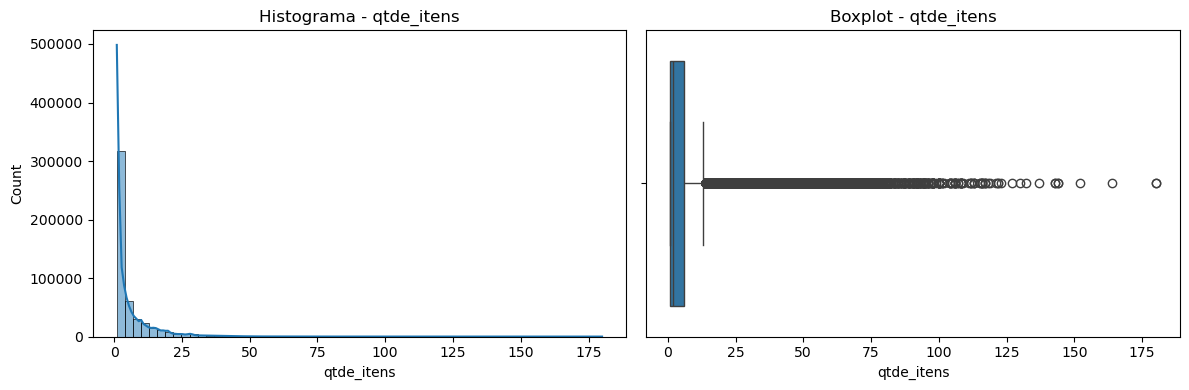

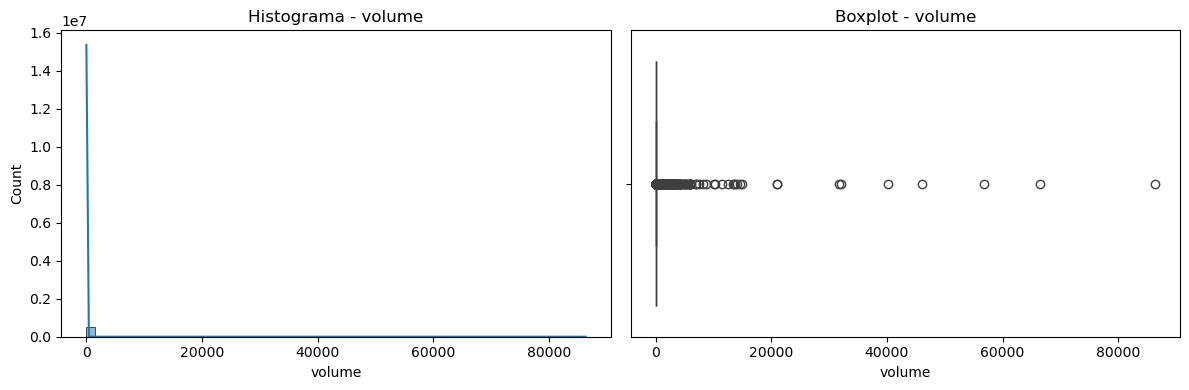

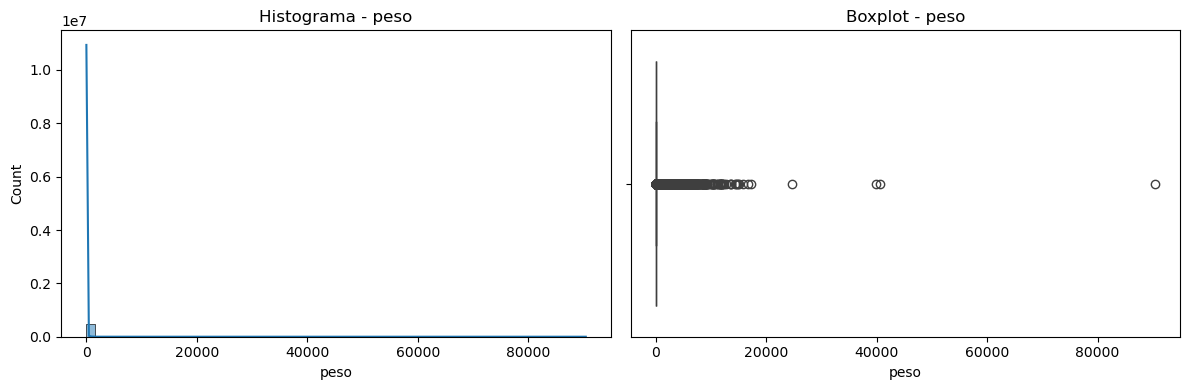

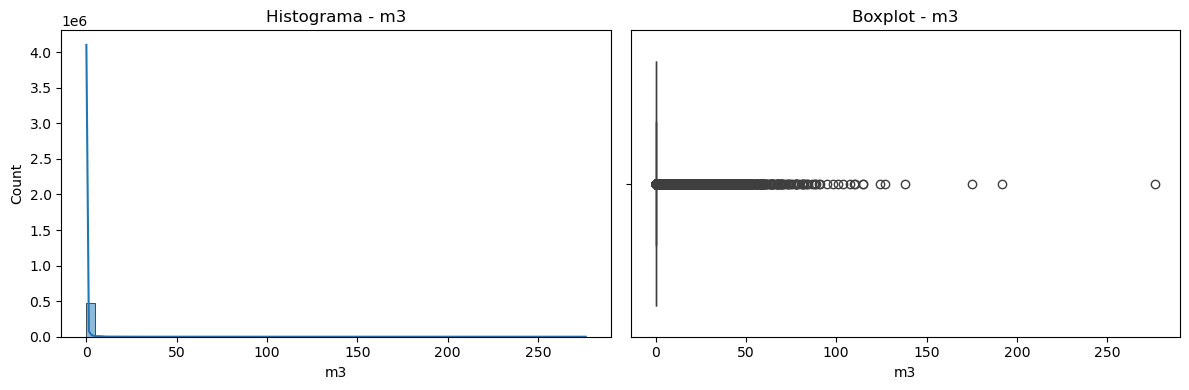

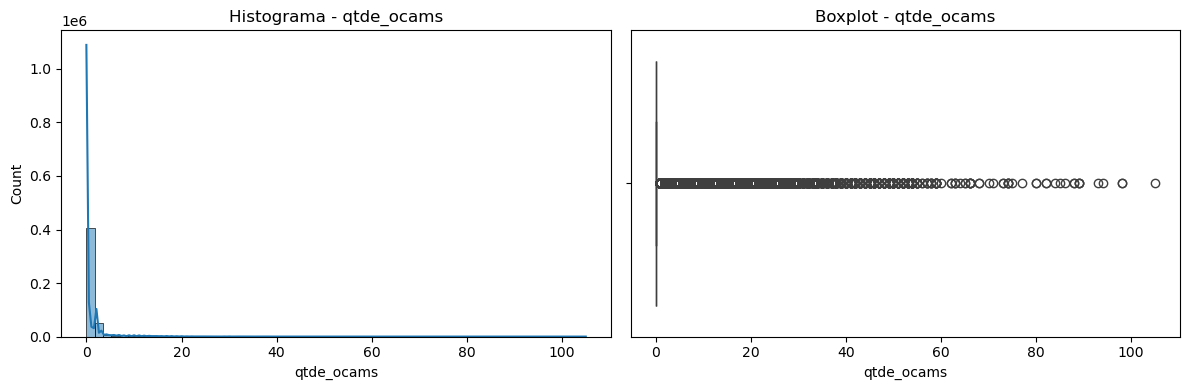

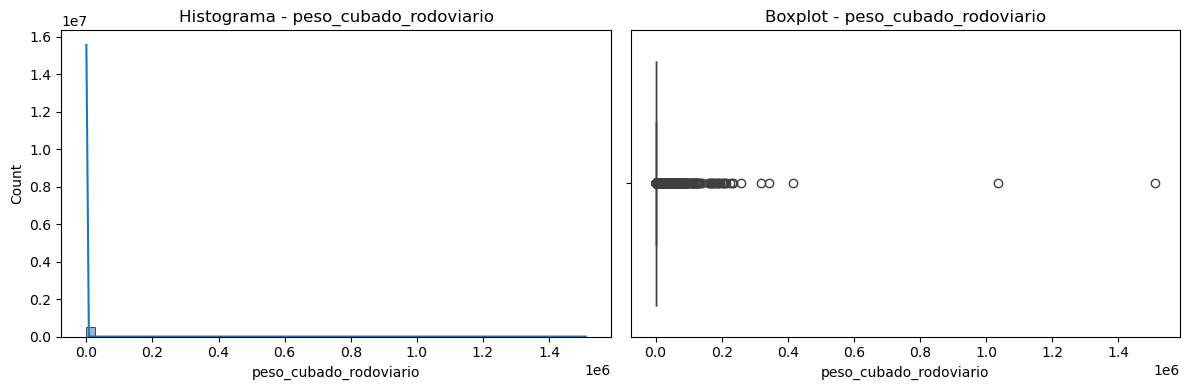

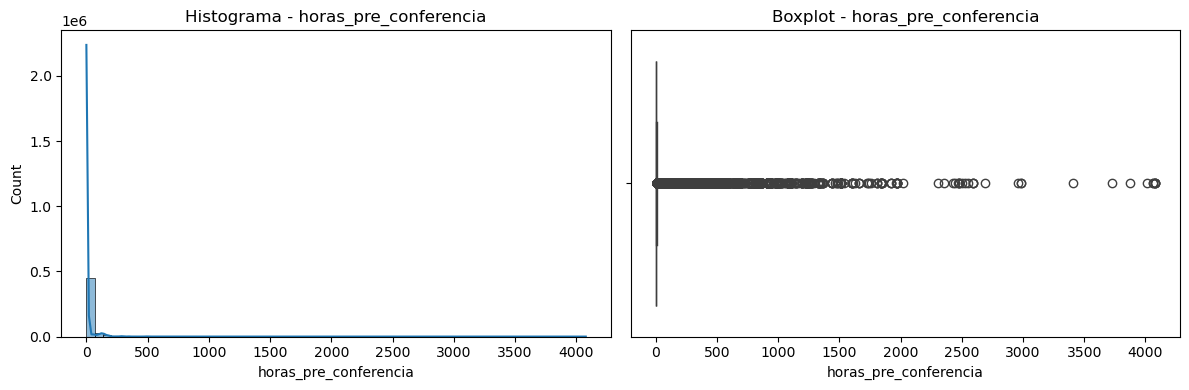

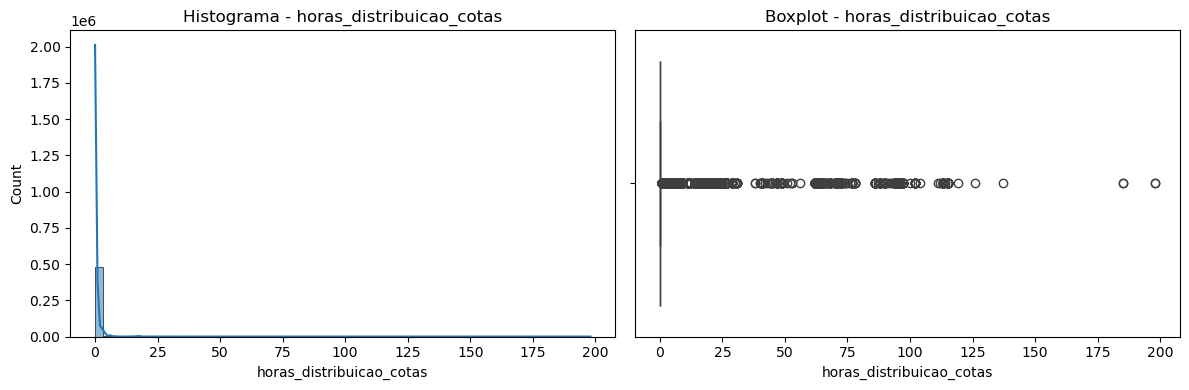

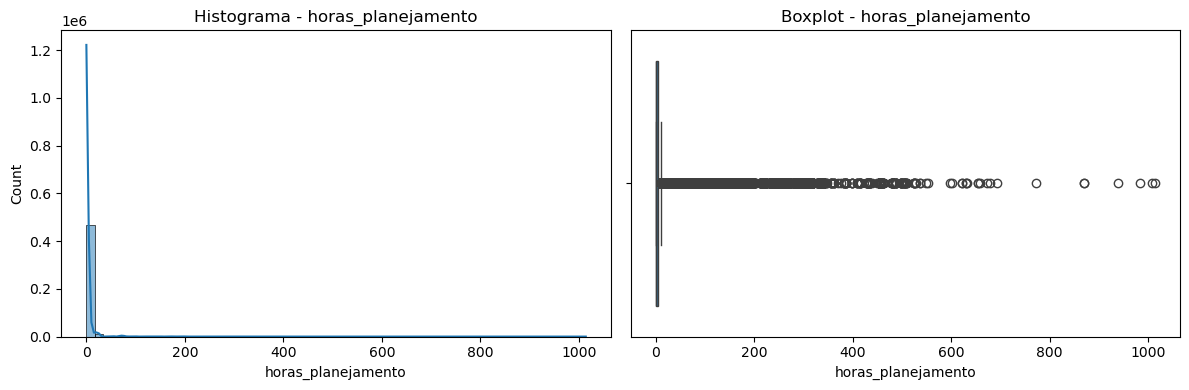

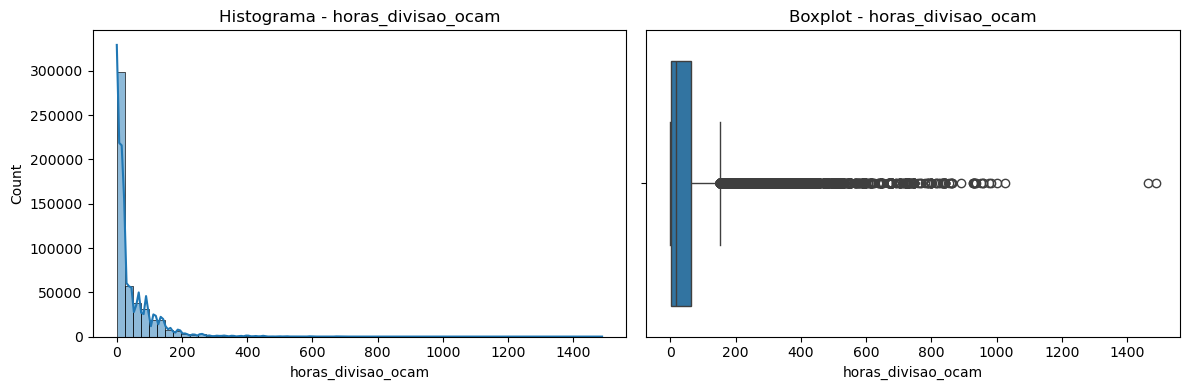

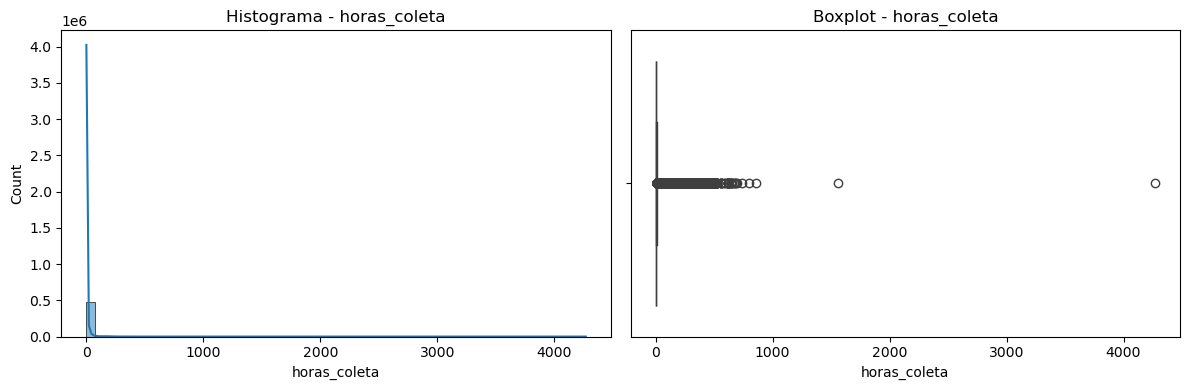

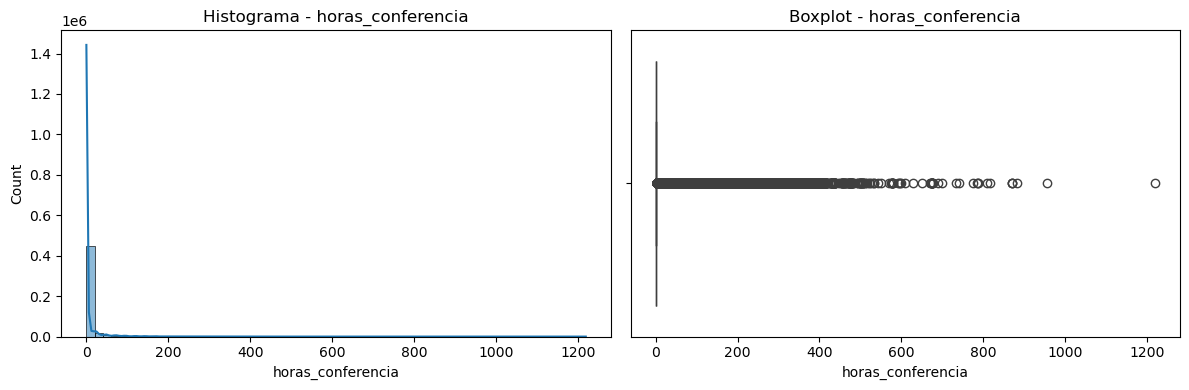

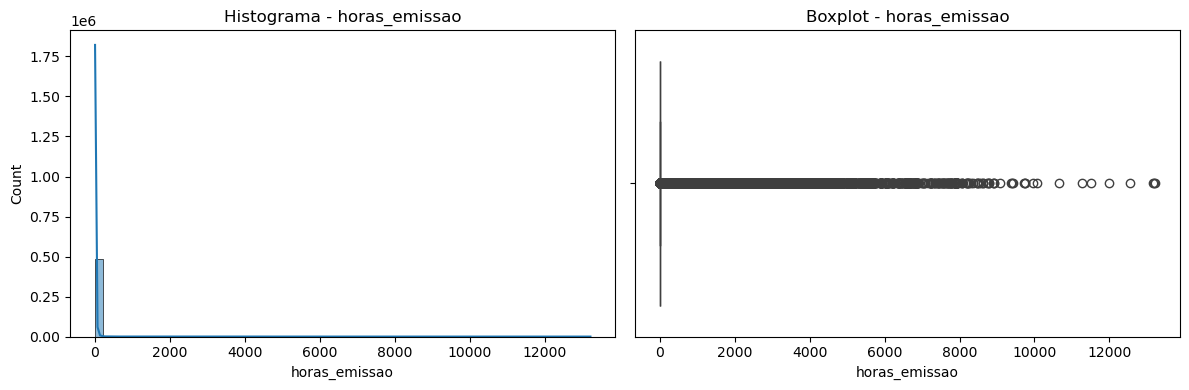

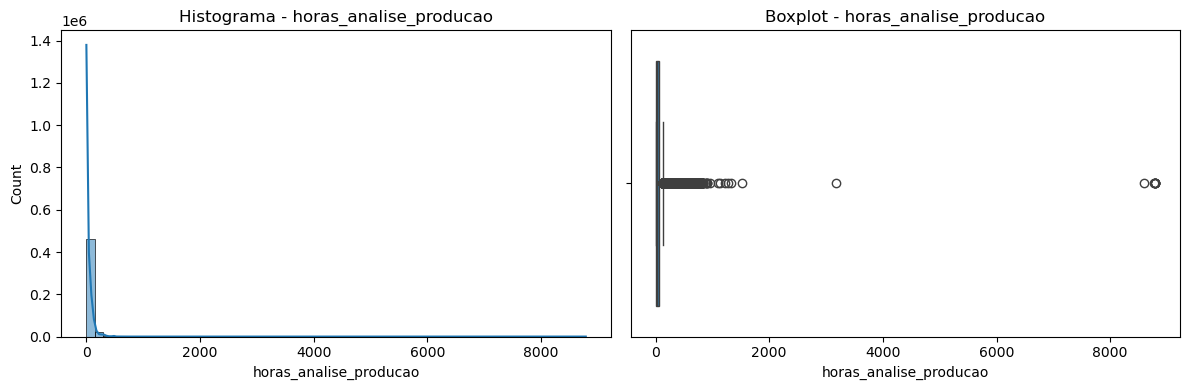

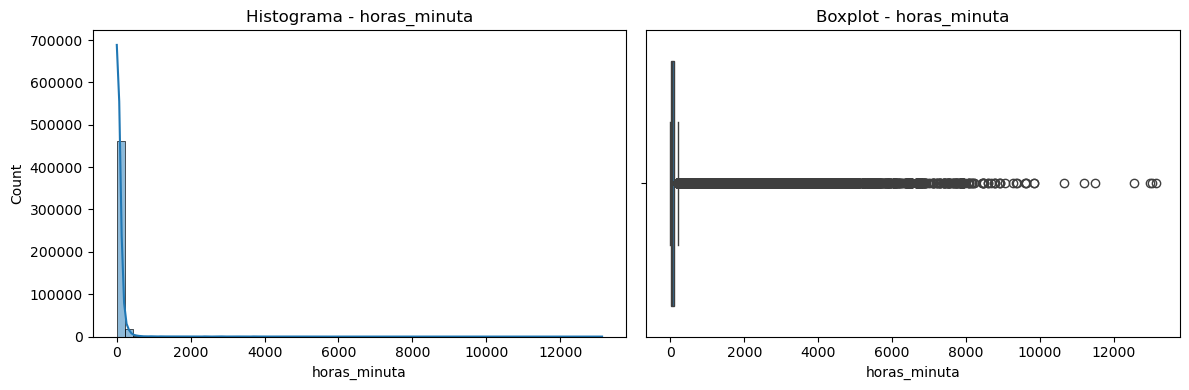

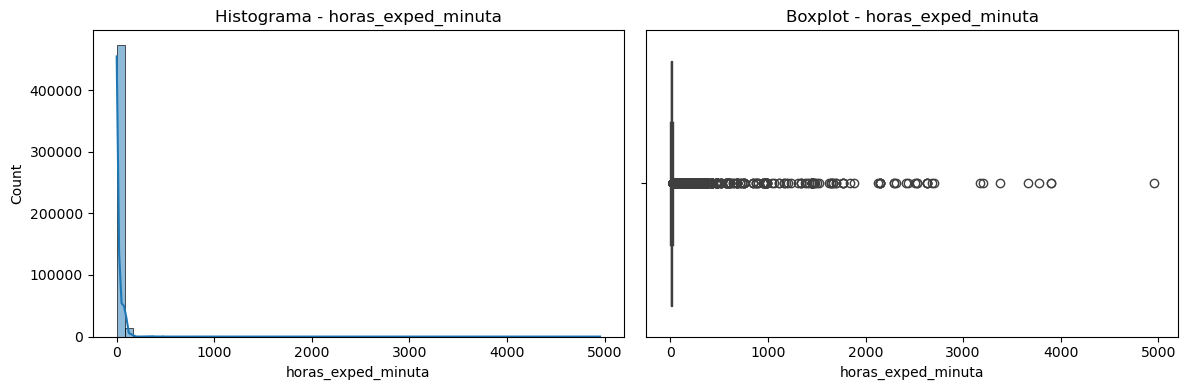

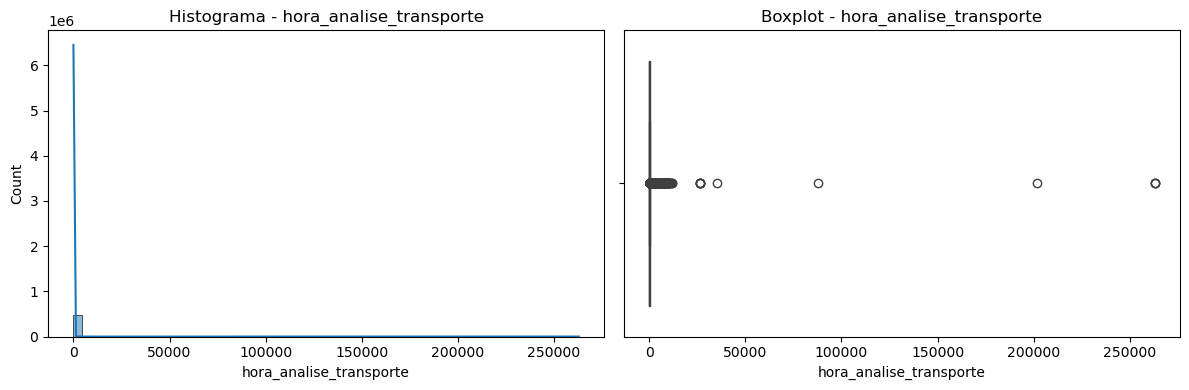

In [27]:
cols_plot = [
    'qtde_itens', 'volume', 'peso', 'm3',
    'qtde_ocams', 'peso_cubado_rodoviario',
    'horas_pre_conferencia', 'horas_distribuicao_cotas',
    'horas_planejamento', 'horas_divisao_ocam',
    'horas_coleta', 'horas_conferencia',
    'horas_emissao', 'horas_analise_producao',
    'horas_minuta', 'horas_exped_minuta',
    'hora_analise_transporte'
]

for col in cols_plot:
    plt.figure(figsize=(12,4))

    # Histograma
    plt.subplot(1,2,1)
    sns.histplot(df_main[col], kde=True, bins=60)
    plt.title(f"Histograma - {col}")

    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df_main[col])
    plt.title(f"Boxplot - {col}")

    plt.tight_layout()
    plt.show()


***Nota Técnica:** As distribuições gráficas das variáveis numéricas reforçam o diagnóstico obtido nas etapas estatísticas anteriores:

> - **Histogramas:** Mostram alta concentração de valores próximos de zero, seguidos por uma cauda longa à direita. Isso confirma que a maior parte dos pedidos é simples, mas existe um conjunto pequeno de casos altamente volumosos, muito provavelmente são pedidos solicitaçdos pelos maiores clientes da empresa como NTL, SAM e PEG.
>
> - **Boxplots:** Evidenciam grande quantidade de outliers, distribuídos muito além dos limites interquartis. Esses pontos extremos representam pedidos atípicos com elevada complexidade operacionale, não são erros de coleta, e sim casos reais que impactam o processo.

---

**Conclusão:**
As operações da Zenatur apresentam um comportamento fortemente assimétrico e leptocúrtico:

- maioria dos pedidos pequenos e simples;
- minoria de pedidos extremamente grandes e complexos;
- esses casos extremos elevam a dispersão, deslocam as médias e influenciam diretamente em etapas críticas como OCAM, produção, separação e expedição.

Essas distribuições gráficas confirmam visualmente os achados de média, dispersão, skewness e curtose, consolidando a base para a próxima etapa do EDA: **detecção formal de outliers e análise de impacto operacional**.